# Iris dataset
tensorflow estimators

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


In [369]:
df = pd.read_csv('iris.csv')
class_names = np.array(['setosa', 'versicolor', 'virginica'])

In [370]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [371]:
#need to rename columns. Can't have spaces. 
#Target column needs to be an integer as well

In [372]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [373]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [374]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [375]:
df['target'] = df['target'].apply(int)

In [376]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [377]:
y = df['target']
X = df.drop('target', axis=1)

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [380]:
# feature columns for tensorflow estimator

In [381]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [382]:
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [383]:
import tensorflow as tf

In [384]:
feat_cols

[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [385]:
#create input function
#epochs = how many times you want to go through training data

In [386]:
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train, y=y_train, batch_size=10, num_epochs=5, shuffle=True)

In [387]:
classifier = tf.estimator.DNNClassifier(hidden_units = [10,10,10], n_classes=3,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/t7/0dhzjm_j6dl657hr1t55lqbh0000gn/T/tmpwg6ifubx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a337e8908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [388]:
classifier.train(input_fn=input_func,steps=50)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/t7/0dhzjm_j6dl657hr1t55lqbh0000gn/T/tmpwg6ifubx/model.ckpt.
INFO:tensorflow:loss = 9.589649, step = 1
INFO:tensorflow:Saving checkpoints for 50 into /var/folders/t7/0dhzjm_j6dl657hr1t55lqbh0000gn/T/tmpwg6ifubx/model.ckpt.
INFO:tensorflow:Loss for final step: 2.8671374.


In [389]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test),shuffle=False)

In [390]:
predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/t7/0dhzjm_j6dl657hr1t55lqbh0000gn/T/tmpwg6ifubx/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [391]:
#predictions

In [392]:
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [393]:
#final_preds

In [394]:
from sklearn.metrics import classification_report,confusion_matrix

In [395]:
print(confusion_matrix(y_test,final_preds))

[[13  0  0]
 [ 0 17  1]
 [ 0  0 14]]


In [396]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.97        14

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [398]:
confusion = confusion_matrix(y_test,final_preds)

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


<Figure size 432x288 with 0 Axes>

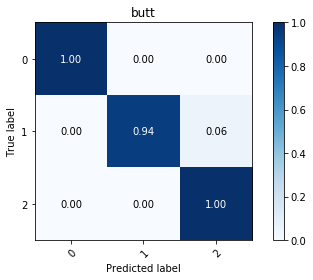

In [402]:
plt.figure()
plot_confusion_matrix(y_test, final_preds, classes = np.array(['0','1','2']),
                      normalize = True, title='butt')